# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools

# This is for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [2]:
tf.__version__

'2.9.2'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('/content/heart.csv')

dataset.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
dataset.shape

(918, 12)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# Numerical Columns 

dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Categorical columns 
dataset.describe(exclude = 'number')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [ ]:
print(dataset['ChestPainType'].unique())
print(dataset['RestingECG'].unique())
print(dataset['ExerciseAngina'].unique())
print(dataset['ST_Slope'].unique())

['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


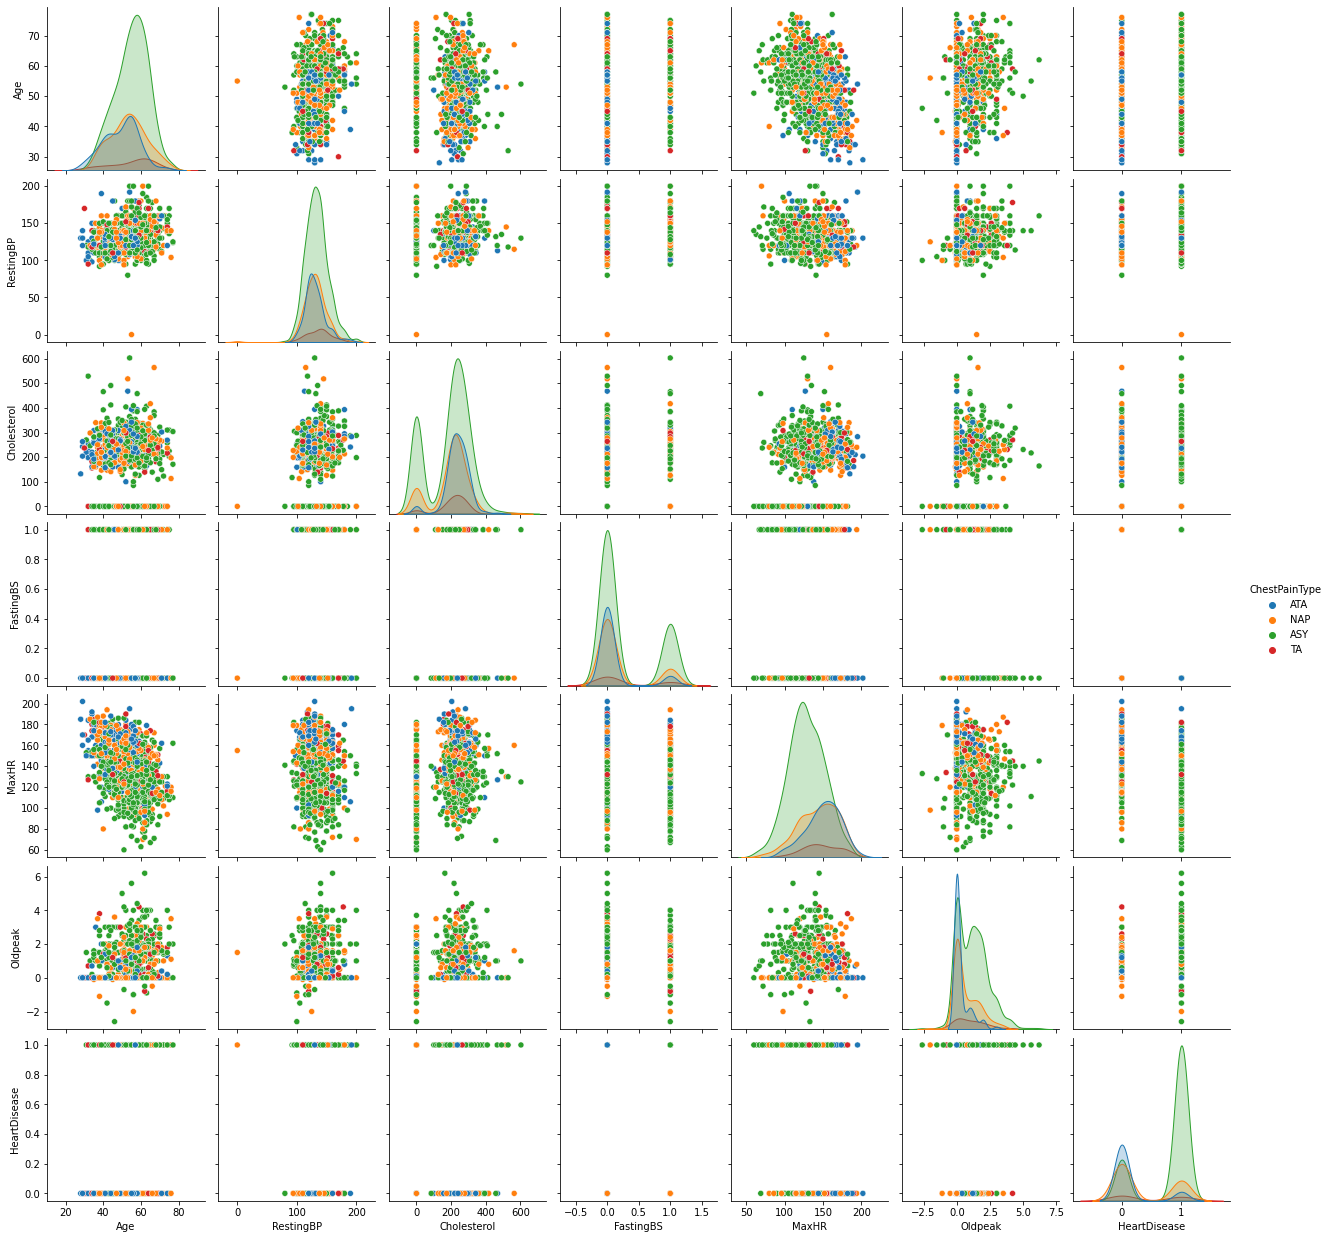

In [ ]:
sns.pairplot(dataset, hue = 'ChestPainType')

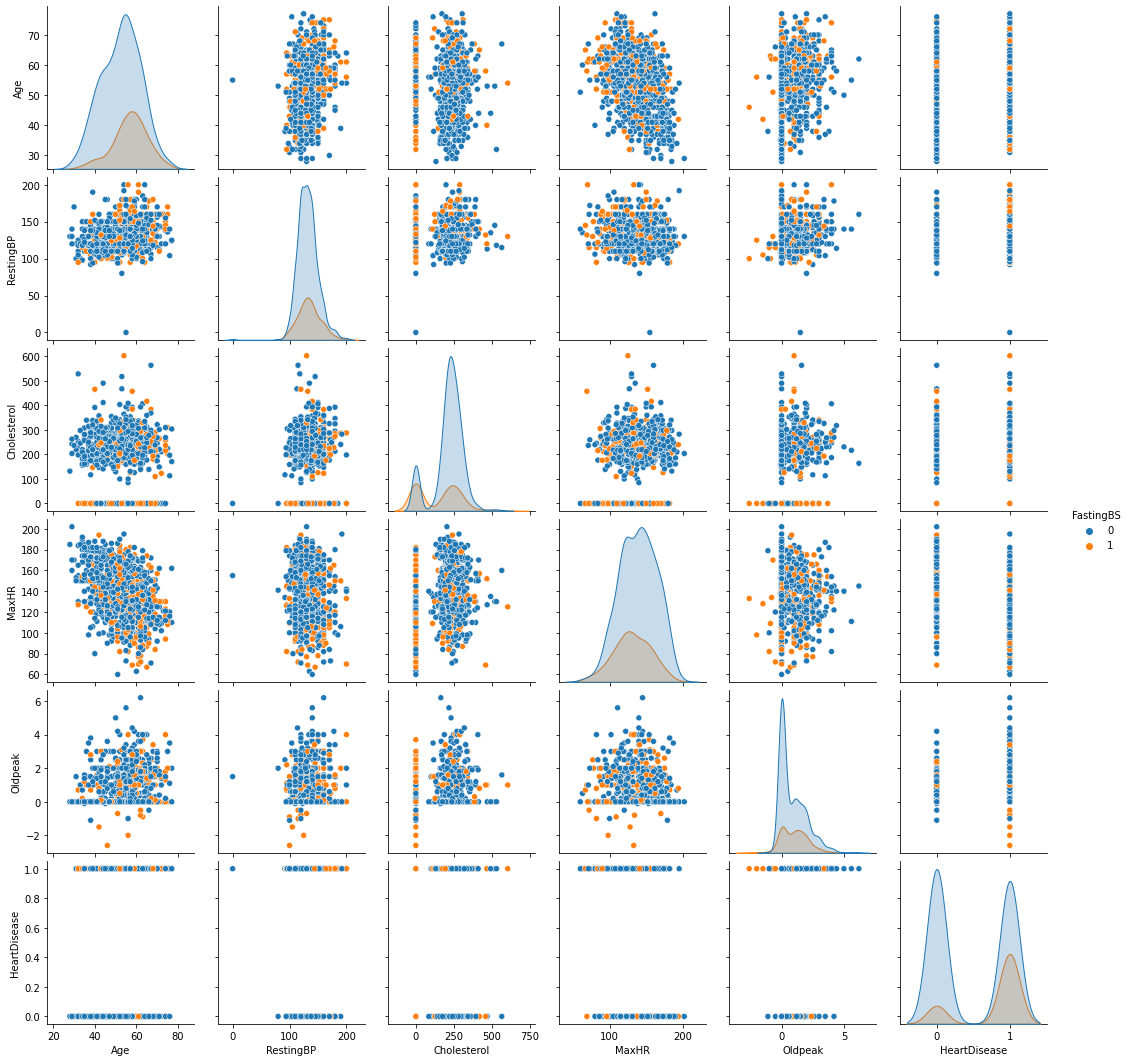

In [ ]:
sns.pairplot(dataset, hue = 'FastingBS' )

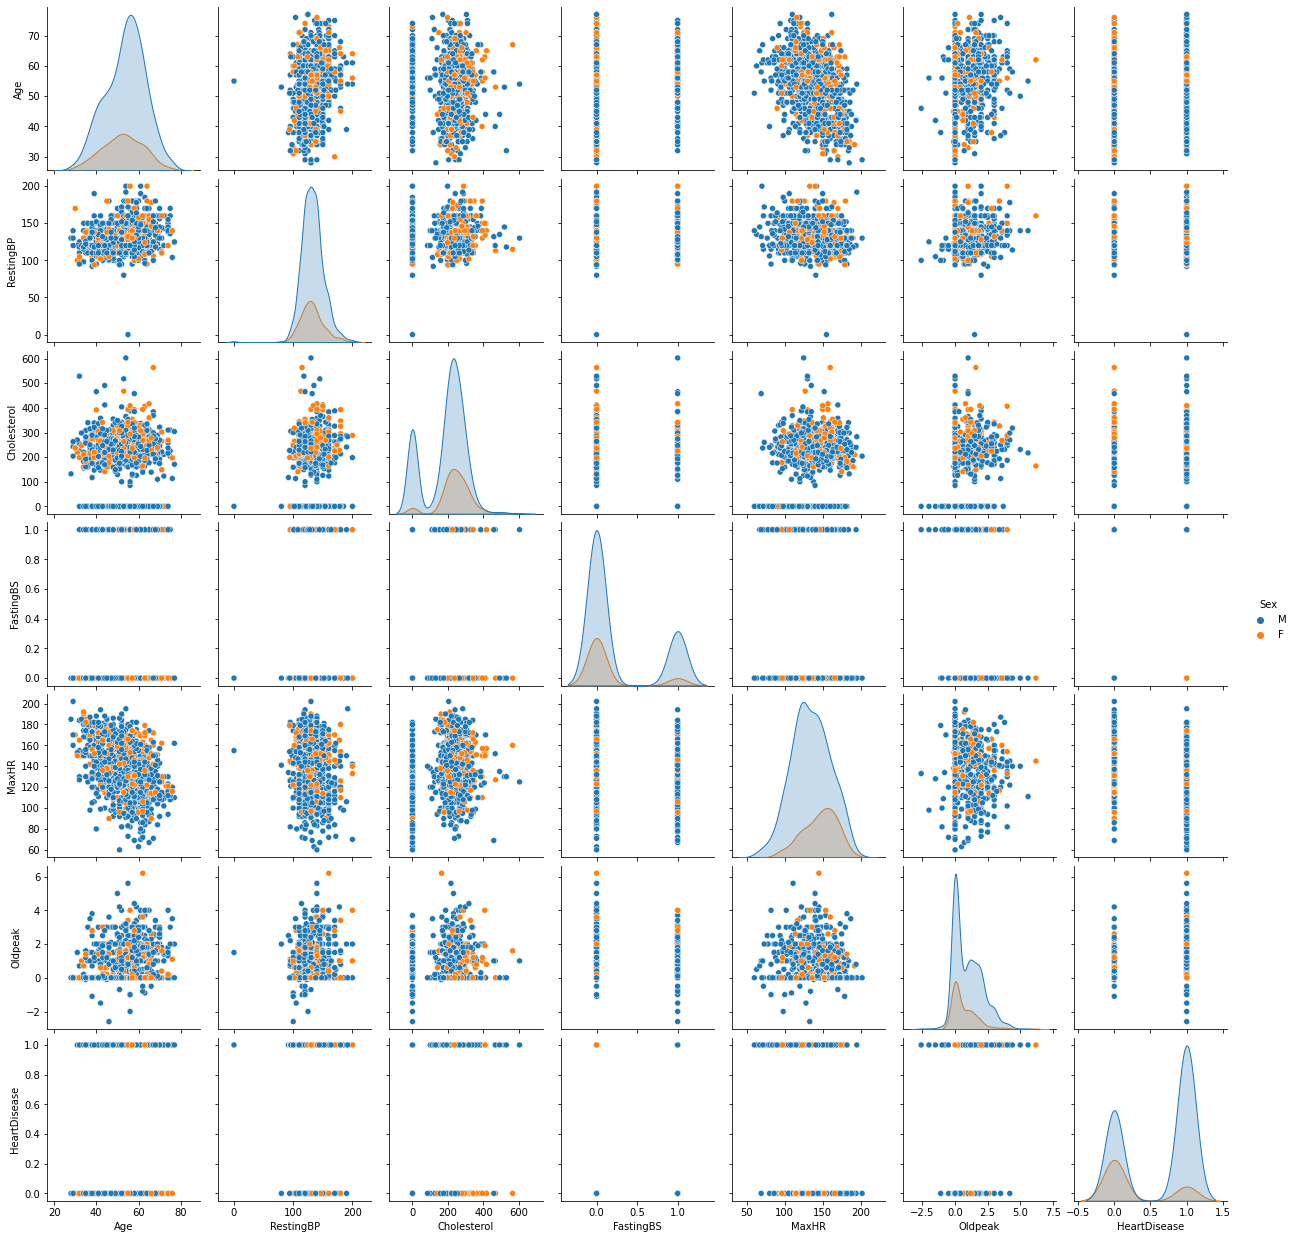

In [ ]:
sns.pairplot(dataset, hue = 'Sex')

In [4]:
# Feature set 
X = dataset.iloc[:, 0:-1]
# The target will be the last column --> do they have HeartDisease or not 
y = dataset.iloc[:, -1]

In [ ]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

### Encoding categorical data

In [5]:
le = LabelEncoder()

# Label Encoding the "Sex" column
X.iloc[:,1] = le.fit_transform(X.iloc[:,1])

# Label Encoding the "ChestPainType" column
X.iloc[:,2] = le.fit_transform(X.iloc[:,2])


# Label Encoding the "RestingECG" column
X.iloc[:,6] = le.fit_transform(X.iloc[:,6])


# Label Encoding the "ExerciseAngina" column
X.iloc[:,8] = le.fit_transform(X.iloc[:,8])

# Label Encoding the "ST_Slope" column
X.iloc[:,10] = le.fit_transform(X.iloc[:,10])

In [6]:
# Sex is now 0 and 1
# Female --> 0 and Male --> 1
print(X.iloc[:,1].unique())

# ChestPainType --> 4 types 
print(X.iloc[:,2].unique())

# RestingECG --> 3 types 
print(X.iloc[:,6].unique())

# ExerciseAngina --> 2 Y or N 
print(X.iloc[:,8].unique())

# ST_Slope --> 3 types
print(X.iloc[:,10].unique())

[1 0]
[1 2 0 3]
[1 2 0]
[0 1]
[2 1 0]


In [ ]:
# data after Encoding transformation 
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


### Splitting the dataset into the Training set and Test set

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

### Feature Scaling

In [38]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled  = sc.transform(X_test)

## Part 2 - Building the ANN

In [39]:
tf.random.set_seed(42)

How to approach optimizing neural network models?

the network will have 4 hidden layers, with a minimum of 64 and a maximum of 192 nodes per layer. We’ll set the step size between nodes to 64, so the possibilities are 64, 128, 192:

In [46]:
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    # node_options = [8 , 5 , 2]
    layer_possibilities = [node_options] * num_layers
    # two_layer_possibilities = [node_options, node_options] --> layer1 = [8 , 5 , 2] , layer2 = [8 , 5 , 2]
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    # To get every possible permutation of the options among two layers, you can use the product() function from itertools:
    # --> layers = [(8, 8), (8, 5)] 

    models = []
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''

        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += f'dense{nodes_at_layer}_'

        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = model_name[:-1]
        models.append(model)
        
    return models

In [48]:
all_models = get_models(
    num_layers=4, 
    min_nodes_per_layer=2, 
    max_nodes_per_layer=8, 
    node_step_size=3, 
    input_shape=(11,)
)

In [49]:
from sklearn.utils import validation
from IPython.core import history
def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 50,
             verbose: int = 0) -> pd.DataFrame:
    
    # We'll store the results here
    results = []
    history
    
    def train(model: tf.keras.Sequential) -> dict:
        model.compile(
            loss=tf.keras.losses.binary_crossentropy,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy')
            ]
        )
        
        # Train the model
        history =  model.fit(
            X_train,
            y_train,
            validation_data = (X_test , y_test),
            epochs=epochs,
            verbose=verbose
        )

        # Make predictions on the test set
        preds = model.predict(X_test)
        prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]
        
        # Return evaluation metrics on the test set
        return {
            'model_name': model.name,
            'test_accuracy': accuracy_score(y_test, prediction_classes),
            'test_precision': precision_score(y_test, prediction_classes),
            'test_recall': recall_score(y_test, prediction_classes),
            'test_f1': f1_score(y_test, prediction_classes),
            'history': history
        }
    
    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
       
    return pd.DataFrame(results)

### Compiling the ANN

In [50]:
optimization_results = optimize(
    models=all_models,
    X_train=X_train_scaled,
    y_train=y_train,
    X_test=X_test_scaled,
    y_test=y_test
)

6/6 [==============================] - 0s 2ms/step


In [51]:
#The ruselt of 4 layer and Tangh function
optimization_results.sort_values(by='test_accuracy', ascending=False)

,model_name,test_accuracy,test_precision,test_recall,test_f1,history
78,dense8_dense8_dense8_dense2,0.869565,0.867257,0.915888,0.890909,<keras.callbacks.History object at 0x7fb45a32e...
77,dense8_dense8_dense5_dense8,0.869565,0.880734,0.897196,0.888889,<keras.callbacks.History object at 0x7fb460562...
48,dense5_dense8_dense5_dense2,0.869565,0.887850,0.887850,0.887850,<keras.callbacks.History object at 0x7fb48c2e5...
75,dense8_dense8_dense5_dense2,0.869565,0.887850,0.887850,0.887850,<keras.callbacks.History object at 0x7fb460935...
74,dense8_dense8_dense2_dense8,0.864130,0.879630,0.887850,0.883721,<keras.callbacks.History object at 0x7fb460acd...
...,...,...,...,...,...,...
6,dense2_dense2_dense8_dense2,0.798913,0.850000,0.794393,0.821256,<keras.callbacks.History object at 0x7fb4d37cf...
54,dense8_dense2_dense2_dense2,0.581522,0.581522,1.000000,0.735395,<keras.callbacks.History object at 0x7fb48402b...
55,dense8_dense2_dense2_dense5,0.581522,0.581522,1.000000,0.735395,<keras.callbacks.History object at 0x7fb483e63...
2,dense2_dense2_dense2_dense8,0.581522,0.581522,1.000000,0.735395,<keras.callbacks.History object at 0x7fb4d4717...


In [53]:
history = optimization_results.history.iloc[0].history
history

{'loss': [0.6930892467498779,
  0.6926318407058716,
  0.6921675205230713,
  0.6917773485183716,
  0.6914153099060059,
  0.6911278963088989,
  0.6908707618713379,
  0.6905970573425293,
  0.690423846244812,
  0.6902293562889099,
  0.6900665760040283,
  0.689924955368042,
  0.6898123621940613,
  0.6896819472312927,
  0.6895914673805237,
  0.6894873976707458,
  0.6894108057022095,
  0.6893568634986877,
  0.6892871260643005,
  0.6892498135566711,
  0.6891993284225464,
  0.6891583204269409,
  0.6891469955444336,
  0.6890877485275269,
  0.6890695691108704,
  0.6890276074409485,
  0.6890338063240051,
  0.6890174150466919,
  0.6889987587928772,
  0.6889590620994568,
  0.688974142074585,
  0.6889614462852478,
  0.6889330148696899,
  0.6889292597770691,
  0.6889179944992065,
  0.6889038681983948,
  0.6889012455940247,
  0.68890380859375,
  0.6888879537582397,
  0.6888964772224426,
  0.6889187693595886,
  0.6888792514801025,
  0.6888732314109802,
  0.6889456510543823,
  0.6888784170150757,
  0.688

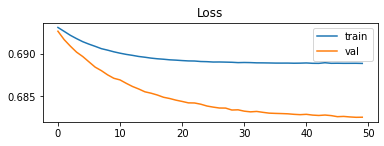

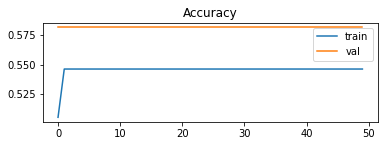

In [54]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
res = {key: history[key] for key in history.keys()
       & {'loss', 'val_loss'}}
plt.plot(res['loss'], label='train')
plt.plot(res['val_loss'], label='val')
plt.legend()
plt.show()

# plot accuracy during training
plt.subplot(212)
res = {key: history[key] for key in history.keys()
       & {'Accuracy', 'val_accuracy'}}
plt.title('Accuracy')
plt.plot(history['accuracy'], label='train')
plt.plot(history['val_accuracy'], label='val')
plt.legend()
plt.show()

#Summary of used Three Different Functions and Layers:-

#1- When we use 4 layers and Tanh function
# The best numbers of nodes that gives us 86% is 
* Layer 1 - dense5
* Layer 2 - dense8
* Layer 3 - dense2
* Layer 4 - dense8


# 2- When we use 4 layers and Relu function
# The best numbers of nodes that gives us 86% is
* Layer 1 - dense8
* Layer 2 - dense8
* Layer 3 - dense8
* Layer 3 - dense2


#3-  When we use 4 layers and Sigmoid function
# The best numbers of nodes that gives us 85% is
* Layer 1 - dense5
* Layer 2 - dense2
* Layer 3 - dense2
* Layer 4 - dense8


# Classification Models

#1- Random Forest For Classification

In [ ]:
class_forest = RandomForestClassifier(n_estimators = 5, criterion = 'gini',max_depth= 3, random_state = 0)

class_forest.fit(X_train, y_train)
preds_class = class_forest.predict(X_test)

In [ ]:
val_train = round(class_forest.score(X_train, y_train),2)*100
val_test = round(class_forest.score(X_test, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 85.0%
Test Set Accuracy: 84.0%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


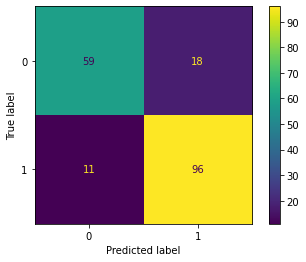

In [ ]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_forest,X_test, y_test);

#2- Support Vector For Classification

In [ ]:
class_sv = SVC(kernel = 'linear', random_state = 0)

class_sv.fit(X_train, y_train)
preds_class = class_sv.predict(X_test)

In [ ]:
val_train = round(class_sv.score(X_train, y_train),2)*100
val_test = round(class_sv.score(X_test, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 87.0%
Test Set Accuracy: 84.0%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


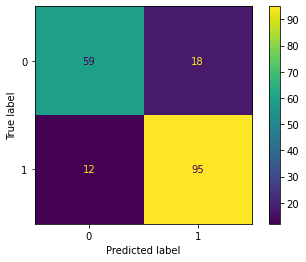

In [ ]:
# We can also make a simple confusion matrix
plot_confusion_matrix(class_sv, X_test, y_test);

#3- Decision Trees For Classification

In [ ]:
class_tree = DecisionTreeClassifier(criterion='gini', max_depth=3)

class_tree.fit(X_train, y_train)
preds_class = class_tree.predict(X_test)

In [ ]:
val_train = round(class_tree.score(X_train, y_train),2)*100
val_test = round(class_tree.score(X_test, y_test),2)*100

print(f'Training Accuracy: {val_train}%')
print(f'Test Set Accuracy: {val_test}%')

Training Accuracy: 87.0%
Test Set Accuracy: 83.0%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


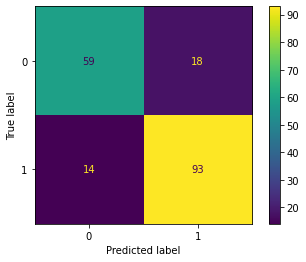

In [ ]:
# We can also make a simple confusion matrix

plot_confusion_matrix(class_tree, X_test, y_test);

#Classification Analysis Summary

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

Text(0.5, 1.0, 'Support Vector Classifier Results')

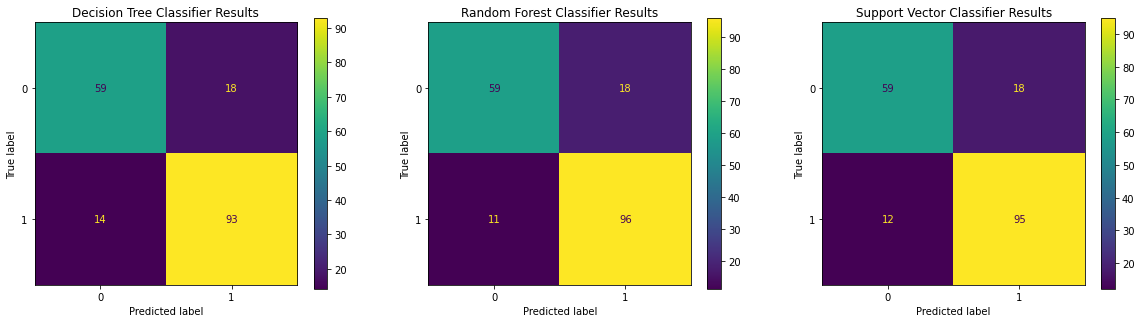

In [ ]:
f, axes = plt.subplots(1, 3, figsize=(20, 5))


disp_tree = plot_confusion_matrix(class_tree, X_test, y_test, ax= axes[0])
disp_tree.ax_.set_title('Decision Tree Classifier Results')

disp_forest = plot_confusion_matrix(class_forest, X_test, y_test, ax= axes[1])
disp_forest.ax_.set_title('Random Forest Classifier Results')

disp_sv = plot_confusion_matrix(class_sv, X_test, y_test, ax= axes[2])
disp_sv.ax_.set_title('Support Vector Classifier Results')

#The ANN is give us accuracy higher than theses classification models.